In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
%matplotlib inline

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = .05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{.2 - |x-.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ at time $t = .4$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.

In [3]:
nu = 0.05 # Initialize nu
M, J = 10, 6 # Initialize M and J
x, deltaX = np.linspace(0, 1, J + 1, retstep = True) # Get the domains for x and t
t, deltaT = np.linspace(0, 1, M + 1, retstep = True)
U = np.zeros((M + 1, J + 1)) # initialize U

lam = nu*deltaT/(deltaX**2) # Get lambda 
U[:, 0] = 0 # Initialize boundary conditions 
U[:, -1] = 0

f = lambda x: 2*np.maximum(.2 - np.abs(x - 0.5), 0)
f = np.vectorize(f)
U[0, 1:-1] = f(x[1:-1]) # More boundary conditions 

# Construct A
main_d = [1 if ii == 0 or ii == J else 1-2*lam for ii in range(J + 1)]
main_diag = np.diag(main_d, 0)
above = [0 if ii == 0 else lam for ii in range(J)]
above_diag = np.diag(above, 1)
below = [lam if ii != J-1 else 0 for ii in range(J)]
below_diag = np.diag(below, -1)
A = main_diag + above_diag + below_diag

# Update U
for tt in range(1, M + 1):
    U[tt, :] = A@U[tt - 1, :]

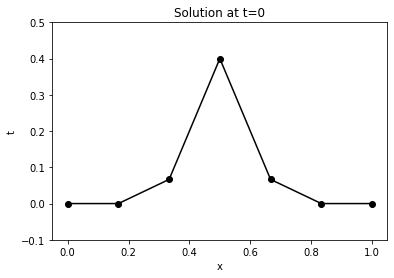

In [4]:
# Plot for solution at t=0
plt.plot(x, U[0, :], "-o", color = "black")
plt.xlabel("x")
plt.ylabel("t")
plt.ylim((-.1, .5))
plt.title("Solution at t=0")
plt.show()

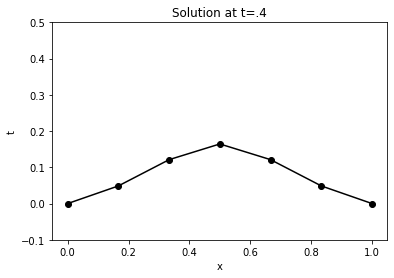

In [5]:
# Plot for solution at t=0.4
plt.plot(x, U[4, :], "-o", color = "black")
plt.xlabel("x")
plt.ylabel("t")
plt.ylim((-.1, .5))
plt.title("Solution at t=.4")
plt.show()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


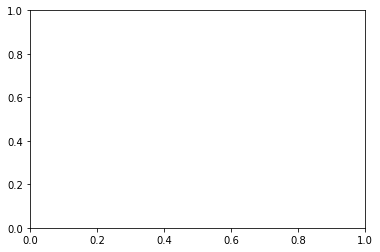

In [9]:
nu = 1 # Initialize nu
M, J = 70, 140 # Initialize M and J
x, deltaX = np.linspace(-12, 12, J + 1, retstep = True) # Get the domains for x and t
t, deltaT = np.linspace(0, 1, M + 1, retstep = True)
U = np.zeros((M + 1, J + 1)) # Initialize U

lam = nu*deltaT/(deltaX**2) # Get lambda 
U[:, 0] = 0 # Initialize boundary conditions 
U[:, -1] = 0

f = lambda x: np.maximum(1 - x**2, 0)
f = np.vectorize(f)
U[0, 1:-1] = f(x[1:-1]) # More boundary conditions 

# Construct A 
main_d = [1 if ii == 0 or ii == J else 1-2*lam for ii in range(J + 1)]
main_diag = np.diag(main_d, 0)
above = [0 if ii == 0 else lam for ii in range(J)]
above_diag = np.diag(above, 1)
below = [lam if ii != J-1 else 0 for ii in range(J)]
below_diag = np.diag(below, -1)
A = main_diag + above_diag + below_diag

# Update U
for tt in range(1, M + 1):
    U[tt, :] = A@U[tt - 1, :]

# Initialize things for animation 
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111)

def update(i):
    """Plot each iteration of the solution through time."""
    ax.clear()
    ax.set_xlim((-12, 12))
    ax.set_ylim((-0.1, 1))
    ax.plot(x, U[i])
    ax.set_title("Stable")
    ax.set_xlabel("x")
    ax.set_ylabel("U(x)")

# Generate the animation     
ani1 = animation.FuncAnimation(fig, update, frames = range(len(U)), interval = 30)

In [10]:
HTML(ani1.to_html5_video())

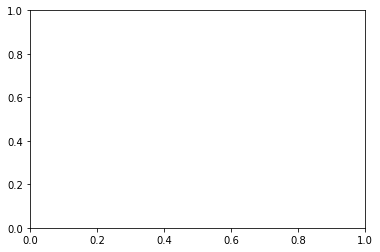

In [11]:
nu = 1 # Initialize nu
M, J = 66, 140 # Initialize M and J
x, deltaX = np.linspace(-12, 12, J + 1, retstep = True) # Get the domains for x and t
t, deltaT = np.linspace(0, 1, M + 1, retstep = True)
U = np.zeros((M + 1, J + 1)) # Initialize U

lam = nu*deltaT/(deltaX**2) # Get lambda 
U[:, 0] = 0 # Initialize boundary conditions 
U[:, -1] = 0

f = lambda x: np.maximum(1 - x**2, 0)
f = np.vectorize(f)
U[0, 1:-1] = f(x[1:-1]) # More boundary conditions 

# Construct A 
main_d = [1 if ii == 0 or ii == J else 1-2*lam for ii in range(J + 1)]
main_diag = np.diag(main_d, 0)
above = [0 if ii == 0 else lam for ii in range(J)]
above_diag = np.diag(above, 1)
below = [lam if ii != J-1 else 0 for ii in range(J)]
below_diag = np.diag(below, -1)
A = main_diag + above_diag + below_diag

# Update U
for tt in range(1, M + 1):
    U[tt, :] = A@U[tt - 1, :]
    
# Initialize things for animation 
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111)

def update(i):
    """Plot each iteration of the solution through time."""
    ax.clear()
    ax.set_xlim((-12, 12))
    ax.set_ylim((-0.1, 1))
    ax.plot(x, U[i])
    ax.set_title("Unstable")
    ax.set_xlabel("x")
    ax.set_ylabel("U(x)")

# Generate animation 
ani2 = animation.FuncAnimation(fig, update, frames = range(len(U)), interval = 30)

In [12]:
HTML(ani2.to_html5_video())

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}

Demonstrate that the numerical approximation at $t = 1$ converges to  $u(x,t=1)$.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in Figure 4.
The slope of the line there shows the proper rate of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition and we can use the same number of intervals in time and space.

In [13]:
def heat_cn(nu,f,xbounds,tbounds,xsteps,tsteps):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1] t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
    """
    J, M = xsteps, tsteps # Get J and M
    x0, x1 = xbounds # Get bounds for x and t
    t0, t1 = tbounds
    x, deltaX = np.linspace(x0, x1, J + 1, retstep = True) # Get domains for x and t 
    t, deltaT = np.linspace(t0, t1, M + 1, retstep = True)
    
    U = np.zeros((M + 1, J + 1)) # Initialize U
    lam = nu*deltaT/(2*deltaX**2) # Get lambda 
    U[:, 0] = 0 # Initialize boundary conditions 
    U[:, -1] = 0
    U[0, 1:-1] = f(x[1:-1])
    
    # Construct A 
    main_d = [1 if ii == 0 or ii == J else 1-2*lam for ii in range(J + 1)]
    main_diag = np.diag(main_d, 0)
    above = [0 if ii == 0 else lam for ii in range(J)]
    above_diag = np.diag(above, 1)
    below = [lam if ii != J-1 else 0 for ii in range(J)]
    below_diag = np.diag(below, -1)
    A = main_diag + above_diag + below_diag
    
    # Construct B
    main_d = [1 if ii == 0 or ii == J else 1+2*lam for ii in range(J + 1)]
    main_diag = np.diag(main_d, 0)
    above = [0 if ii == 0 else -lam for ii in range(J)]
    above_diag = np.diag(above, 1)
    below = [-lam if ii != J-1 else 0 for ii in range(J)]
    below_diag = np.diag(below, -1)
    B = main_diag + above_diag + below_diag

    # Update U
    for tt in range(1, M + 1):
        U[tt, :] = np.linalg.solve(B, A@U[tt - 1])
        
    return U, x, t, deltaX

In [14]:
# Initialize inputs for heat_cn
f = lambda x: np.maximum(1 - x**2, 0)
f = np.vectorize(f)
nu = 1
xbounds = (-12, 12)
tbounds = (0, 1)

steps = [320, 160, 80, 40, 20] # Get different step sizes 
exact_sol = heat_cn(nu, f, xbounds, tbounds, 640, 640)[0] # Get the exact solution

In [15]:
# Initialize lists for error and h values 
error = []
h = []

js = [2**(j) for j in range(1, 6)]
for val, j_ in zip(steps, js): # Loop through each step size and calculate the error
    U, x, t, deltaX = heat_cn(nu, f, xbounds, tbounds, val, val)
    h.append(deltaX)
    U1 = U[-1]
    sample = exact_sol[-1, ::j_]
    error.append(np.linalg.norm(sample - U1, ord = np.inf))

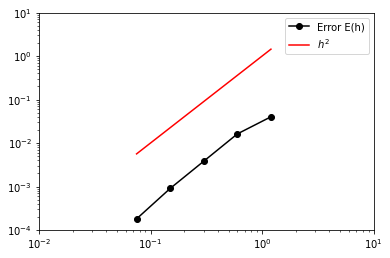

In [17]:
# Generate plots for error 
h2 = [val**2 for val in h]
plt.loglog(h, error, "-o", color = "black", label = "Error E(h)")
plt.loglog(h, h2, color = "red", label = "$h^2$")
plt.xlim((10**(-2), 10))
plt.ylim((10**(-4), 10))
plt.legend()
plt.title("Error for Crank-Nicolson")
plt.show()